# MOTZ (Marching-Of-The-Zeros)

### Load dependencies

In [1]:
import numpy as np, meshio, optimesh, dmsh, meshplex # These need to be installed (e.g. via pip)
import MOTZ # refers to MOTZ.py in this repository (place in the same folder as this notebook)

## Example 1 (MOTZ returns 'certified')

### Generate an example mesh

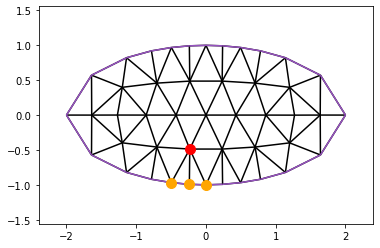

In [2]:
geo = dmsh.Ellipse([0.0, 0.0], 2.0, 1.0)
X, cells = dmsh.generate(geo, 0.4)

# optionally optimize the mesh
X, cells = optimesh.cvt.quasi_newton_uniform_full(X, cells, 1.0e-10, 100)
mesh = meshplex.MeshTri(X, cells)

# The show command uses matplotlib under the hood.
MOTZ.show(
    mesh=mesh, 
    show_coedges=False, 
    boundary_edge_color=(0.59,0.32,0.75), 
    show_node_numbers=False,
    show_cell_numbers=False,
    orange_nodes=[1, 2,3],
    red_nodes=[11],
    save_plot_as=None
)



### Run MOTZ on this mesh

MOTZ started


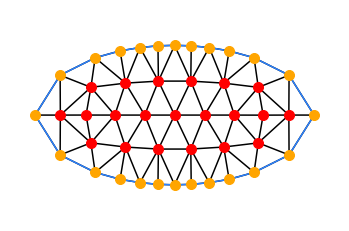

Outer Iteration  0
Inner Iteration - Testing node  9
Inner Iteration - Testing node  10


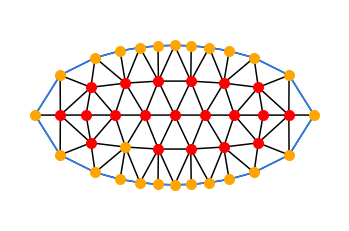

Outer Iteration  1
Inner Iteration - Testing node  9


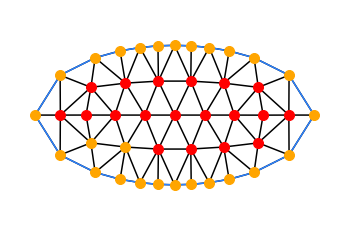

Outer Iteration  2
Inner Iteration - Testing node  11


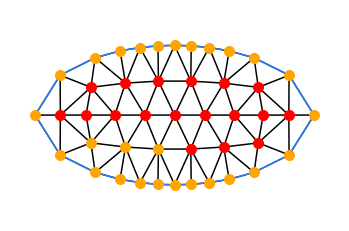

Outer Iteration  3
Inner Iteration - Testing node  12


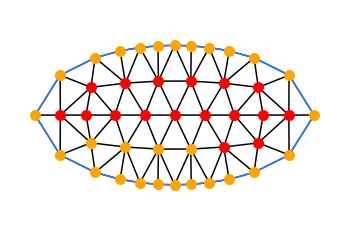

Outer Iteration  4
Inner Iteration - Testing node  13


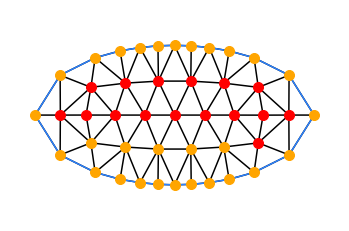

Outer Iteration  5
Inner Iteration - Testing node  14


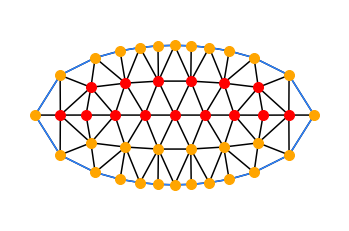

Outer Iteration  6
Inner Iteration - Testing node  18


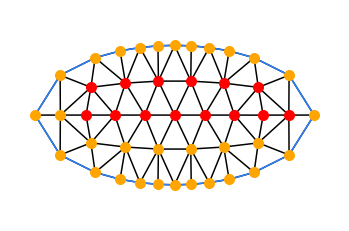

Outer Iteration  7
Inner Iteration - Testing node  19
Inner Iteration - Testing node  20
Inner Iteration - Testing node  21
Inner Iteration - Testing node  22
Inner Iteration - Testing node  23
Inner Iteration - Testing node  24
Inner Iteration - Testing node  25
Inner Iteration - Testing node  26


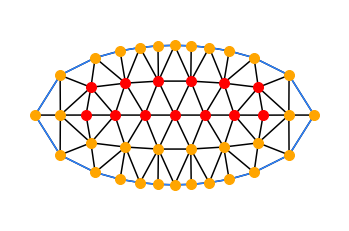

Outer Iteration  8
Inner Iteration - Testing node  19
Inner Iteration - Testing node  20
Inner Iteration - Testing node  21
Inner Iteration - Testing node  22
Inner Iteration - Testing node  23
Inner Iteration - Testing node  24
Inner Iteration - Testing node  25
Inner Iteration - Testing node  30


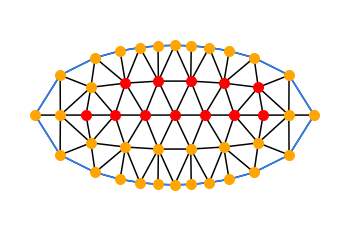

Outer Iteration  9
Inner Iteration - Testing node  19


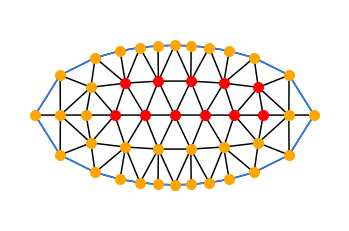

Outer Iteration  10
Inner Iteration - Testing node  20


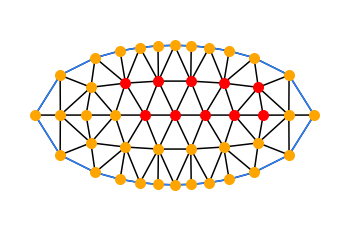

Outer Iteration  11
Inner Iteration - Testing node  21


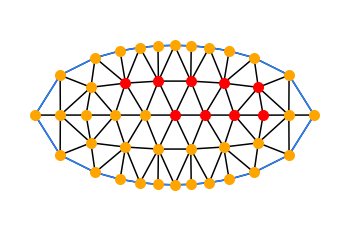

Outer Iteration  12
Inner Iteration - Testing node  22


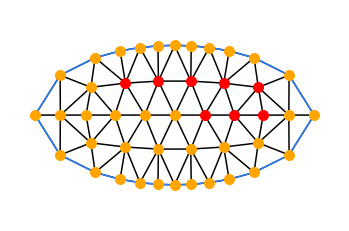

Outer Iteration  13
Inner Iteration - Testing node  23


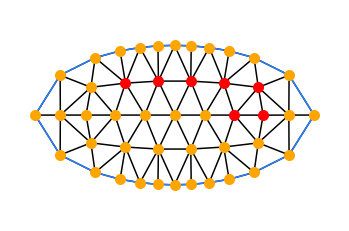

Outer Iteration  14
Inner Iteration - Testing node  24


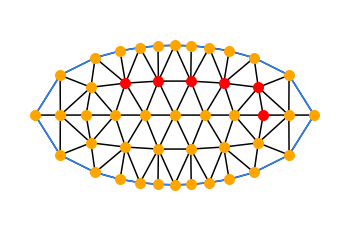

Outer Iteration  15
Inner Iteration - Testing node  25


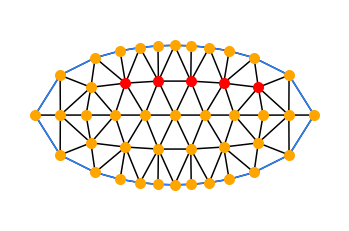

Outer Iteration  16
Inner Iteration - Testing node  31


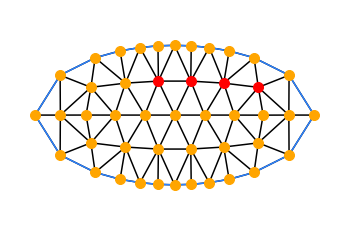

Outer Iteration  17
Inner Iteration - Testing node  32


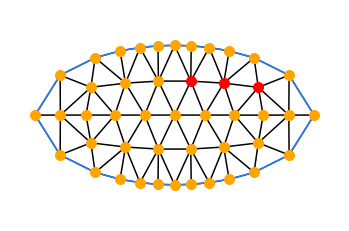

Outer Iteration  18
Inner Iteration - Testing node  33


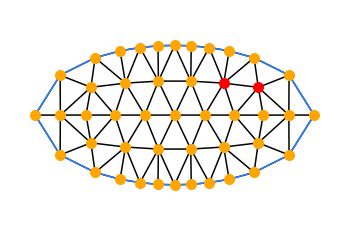

Outer Iteration  19
Inner Iteration - Testing node  34


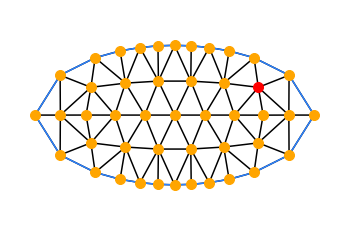

Outer Iteration  20
Inner Iteration - Testing node  35


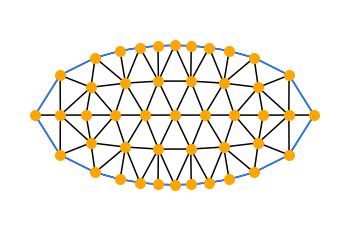

MOTZ complete.
MOTZ_result:  certified
MOTZ_angle:  True
MOTZ_trans:  True


[]

In [4]:
# Run MOTZ. If N_test is initialized with None, 
# it will be automatically set to the boudnary nodes of the mesh
MOTZ.MOTZ(
    mesh, 
    N_test=None, 
    N_dof=None, 
    detailed_output=True
)

## Example 2 (MOTZ returns 'critical')

### Generate an example mesh

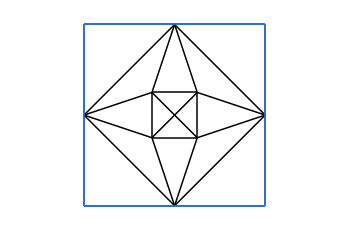

In [21]:
X = np.array([
    [-1, 1], # 0
    [1, 1], # 1
    [1, -1], # 2
    [-1, -1], # 3
    [0, 4], # 4
    [0, -4], # 5
    [4, 0], # 6
    [-4, 0], # 7
    [4, 4], # 8
    [4, -4], # 9
    [-4, -4], # 10
    [-4, 4], # 11
    [0, 0], # 12
])
        
cells = np.array([
    [12, 3, 2],
    [1, 12, 2],
    [0,3, 12],
    [0, 12, 1],
    [4, 1, 0],
    [5, 2, 3],
    [6, 2, 1],
    [7, 0, 3],
    [1, 4, 6],
    [4, 7, 0],
    [5, 7, 3],
    [6, 5, 2],
    [8, 4, 6],
    [9, 6, 5],
    [10, 5, 7],
    [11, 7, 4],
             ])

mesh_orig = meshplex.MeshTri(X, cells)

MOTZ.show(
    mesh=mesh_orig, 
    show_coedges=False, 
    boundary_edge_color=(0.17,0.51,1.0), 
    show_node_numbers=False, 
    orange_nodes=None,
    red_nodes=None,
    show_axes=False
)

### Run MOTZ on this mesh

MOTZ started


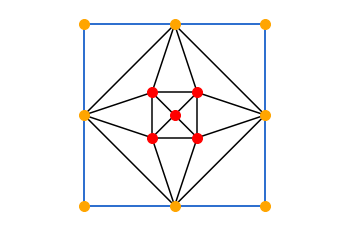

Outer Iteration  0
Inner Iteration - Testing node  0
Inner Iteration - Testing node  1
Inner Iteration - Testing node  2
Inner Iteration - Testing node  3
Inner Iteration - Testing node  12


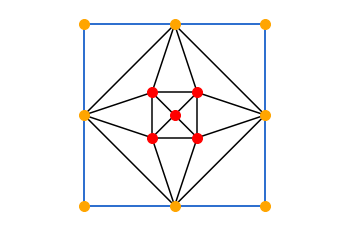

MOTZ complete.
MOTZ_result:  critical
MOTZ_angle:  True
MOTZ_trans:  False


In [22]:
N_dof_orig = MOTZ.MOTZ(
    mesh_orig, 
    N_test=None, 
    N_dof=None, 
    detailed_output=True,
    save_plots=False
)

### Try to improve the mesh iteratively using MOTZ_flip

Improved mesh:


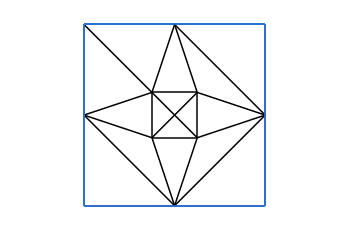

MOTZ started
MOTZ complete.
MOTZ_result:  certified
MOTZ_angle:  True
MOTZ_trans:  True


In [23]:
N_dof = N_dof_orig
mesh = mesh_orig
while len(N_dof)>0:

    print("Improved mesh:")
    mesh = MOTZ.MOTZ_flip(
        X,mesh, 
        N_dof, 
        detailed_output=True, 
        save_plots=False
    )
    

    N_dof = MOTZ.MOTZ(
        mesh, 
        N_test=None, 
        N_dof=None, 
        detailed_output=False,
        save_plots=False
    )
